In [12]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_columns = None
pd.options.display.max_rows = None

inpath = '/MFMDatasets/MFM_bopf/src/multi_predict/results/'
outpath = '/MFMDatasets/MFM_bopf/src/multi_predict/results/'

alg_list = ["LR", "SVC", "MLP", "RF", "GB"]
datasets = "-ALL-"
samp_list = ["NONE", "RAND"]
stat_list = ["ROC_AUC", "PR_AUC", "MCC"]

In [13]:
lr_mcc = pd.read_csv(inpath + "LR" + datasets + "MCC-Results.csv")
#ty = lr_roc[lr_roc['target']=='transfus_yes']
#ty_max = ty['ROC_AUC'].max()
lr_mcc

,Unnamed: 0,under_alg,samp_strat,p_C,p_solver,precision_macro,recall_macro,F1_macro,PR_AUC,ROC_AUC,MCC,TP,FN,FP,TN
0,24,RAND,1.00,10000.0000,liblinear,0.5426,0.8091,0.5086,0.1130,0.8454,0.2294,1350,201,13637,40436
1,3,RAND,1.00,1.0000,lbfgs,0.5425,0.8090,0.5085,0.1144,0.8453,0.2293,1350,201,13648,40425
2,30,RAND,1.00,100000.0000,liblinear,0.5425,0.8089,0.5083,0.1129,0.8457,0.2292,1350,201,13658,40415
3,0,RAND,1.00,1.0000,liblinear,0.5425,0.8088,0.5085,0.1137,0.8455,0.2292,1349,202,13636,40437
4,39,RAND,1.00,0.1000,lbfgs,0.5426,0.8082,0.5091,0.1111,0.8454,0.2291,1345,206,13564,40509
5,6,RAND,1.00,10.0000,liblinear,0.5424,0.8088,0.5082,0.1144,0.8451,0.2290,1350,201,13675,40398
6,36,RAND,1.00,0.1000,liblinear,0.5426,0.8080,0.5092,0.1109,0.8455,0.2290,1344,207,13551,40522
7,27,RAND,1.00,10000.0000,lbfgs,0.5425,0.8086,0.5083,0.1153,0.8453,0.2289,1349,202,13658,40415
8,9,RAND,1.00,10.0000,lbfgs,0.5424,0.8085,0.5082,0.1149,0.8452,0.2288,1349,202,13669,40404
9,33,RAND,1.00,100000.0000,lbfgs,0.5424,0.8085,0.5082,0.1153,0.8452,0.2288,1349,202,13668,40405


### ROC Plots

In [14]:
samp_stats_df = pd.DataFrame(index=stat_list, columns=samp_list)
samp_stats_df

,NONE,RAND
ROC_AUC,NaN,NaN
PR_AUC,NaN,NaN
MCC,NaN,NaN


In [15]:
for samp in samp_list:
    samp_df = lr_mcc[lr_mcc['under_alg'] == samp]
    for stat in stat_list:
        stat_max = samp_df[stat].max()
        samp_stats_df.loc[stat,samp] = stat_max
samp_stats_df        

,NONE,RAND
ROC_AUC,0.8456,0.8467
PR_AUC,0.1192,0.1193
MCC,0.0688,0.2294


<Figure size 432x288 with 0 Axes>

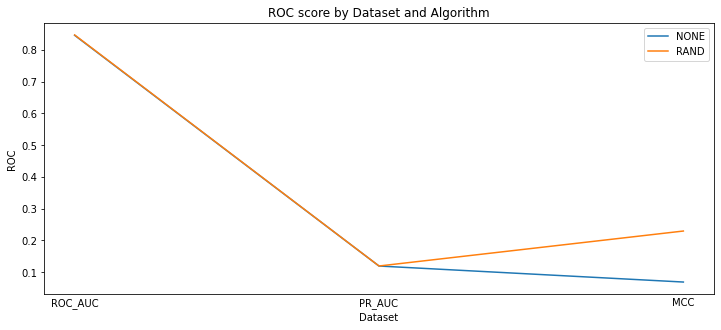

In [17]:
fig = plt.figure()
ax = samp_stats_df.plot(figsize=(12,5), title="ROC score by Dataset and Algorithm")
ax.set_ylabel("ROC")
ax.set_xlabel("Dataset")
ax.tick_params(axis='x',length=0)

Text(0.5, 0, 'Dataset')

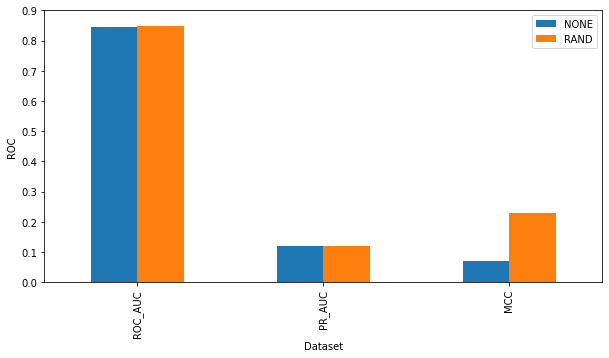

In [21]:
ax = samp_stats_df.plot.bar(ylim=(0.0,0.9), figsize=(10,5))
ax.set_ylabel("Value")
ax.set_xlabel("Dataset")

In [26]:
alg_stats_df = pd.DataFrame(index=stat_list, columns=alg_list)
alg_stats_df

,LR,SVC,MLP,RF,GB
ROC_AUC,NaN,NaN,NaN,NaN,NaN
PR_AUC,NaN,NaN,NaN,NaN,NaN
MCC,NaN,NaN,NaN,NaN,NaN


In [29]:
for alg in alg_list:
    this_df = pd.read_csv(inpath + alg + datasets + "MCC-Results.csv")
    for stat in stat_list:
        print(f'stat = {stat}; this_df[0] = {this_df.loc[0,stat]}')
        alg_stats_df.loc[stat,alg] = this_df.loc[0,stat]
alg_stats_df   

stat = ROC_AUC; this_df[0] = 0.8454
stat = PR_AUC; this_df[0] = 0.113
stat = MCC; this_df[0] = 0.2294
stat = ROC_AUC; this_df[0] = 0.8419
stat = PR_AUC; this_df[0] = 0.109
stat = MCC; this_df[0] = 0.2273
stat = ROC_AUC; this_df[0] = 0.8453
stat = PR_AUC; this_df[0] = 0.1002
stat = MCC; this_df[0] = 0.2279
stat = ROC_AUC; this_df[0] = 0.8542
stat = PR_AUC; this_df[0] = 0.1055
stat = MCC; this_df[0] = 0.2322
stat = ROC_AUC; this_df[0] = 0.8566
stat = PR_AUC; this_df[0] = 0.119
stat = MCC; this_df[0] = 0.2329


,LR,SVC,MLP,RF,GB
ROC_AUC,0.8454,0.8419,0.8453,0.8542,0.8566
PR_AUC,0.113,0.109,0.1002,0.1055,0.119
MCC,0.2294,0.2273,0.2279,0.2322,0.2329


Text(0.5, 0, 'Statistic')

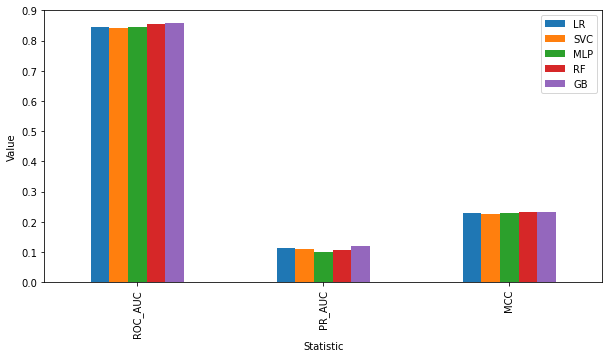

In [31]:
ax = alg_stats_df.plot.bar(ylim=(0.0,0.9), figsize=(10,5))
ax.set_ylabel("Value")
ax.set_xlabel("Statistic")

In [ ]:
my_df = pd.read_csv(inpath + 'RF' + datasets + "ROC-Results.csv")
seeds = my_df['seed'].unique()
ds_seed_df = pd.DataFrame(index=ds_list, columns=seeds)
ds_seed_df

In [ ]:
for seed in seeds:
    for ds in ds_list:
        seed_df = my_df[(my_df['target'] == ds) & (my_df['seed'] == seed)]
        max_roc = seed_df['ROC_AUC'].max()
        ds_seed_df.loc[ds,seed] = max_roc
        #print(f'seed:{seed}; max_roc:{max_roc}')
        
ds_seed_df

In [ ]:
fig = plt.figure()
ax = ds_seed_df.plot(title="RF ROC score by Dataset and Random Seed", figsize=(10,5))
ax.set_ylabel("ROC")
ax.set_xlabel("Dataset")
ax.tick_params(axis='x',length=0)

In [ ]:
rand_seed_df = pd.DataFrame(columns=seeds)
rand_seed_df

In [ ]:
for seed in seeds:
    seed_df = pd.DataFrame(my_df[(my_df['target'] == 'transfus_yes') & (my_df['seed'] == seed)])
    print(seed_df[['seed','ROC_AUC']])
    top_roc = seed_df['ROC_AUC'].sort_values(ascending=False).head(16)
    print(f'seed:{seed}; top_roc:{top_roc}')
    rand_seed_df[seed] = top_roc.values
        
rand_seed_df

In [ ]:
ax = rand_seed_df.plot(title="Top ROC scores by Random Seed", figsize=(10,5))
ax.set_ylabel("ROC")
ax.set_xlabel("Seed")
ax.tick_params(axis='x',length=0)

In [ ]:
for alg in alg_list:
    ds = 'transfus_yes'
    this_df = pd.read_csv(inpath + alg + datasets + "ROC-Results.csv")
    seeds = this_df['seed'].unique()
    ty_df = this_df[this_df['target'] == ds]
    ds_max = ty_df['ROC_AUC'].max()
    alg_roc_df.loc[ds,alg] = ds_max
alg_roc_df        

In [ ]:
merged_df = pd.DataFrame()
for alg in alg_list:
    if merged_df.empty:
        full_df = pd.read_csv(inpath + alg + datasets + "coef_rank.csv", index_col=0)
        merged_df = pd.DataFrame(full_df['mean_rank'])
        merged_df.rename(columns={'mean_rank':alg}, inplace=True)
    else:
        full_df = pd.read_csv(inpath + alg + datasets + "coef_rank.csv", index_col=0)
        this_df = pd.DataFrame(full_df['mean_rank'])
        this_df.rename(columns={'mean_rank':alg}, inplace=True)
        merged_df = merged_df.merge(this_df, left_index=True, right_index=True, how="right")
        
merged_df

In [ ]:
merged_df['mean_rank'] = merged_df.apply(np.mean, axis=1).rank().astype(int)
merged_df.sort_values('mean_rank', inplace=True)
merged_df

In [ ]:
#top20 = merged_df.iloc[:20,:4]
#top20 = merged_df.iloc[:20,2:4]
top20 = merged_df.iloc[:20,0:2]
fig = plt.figure()
ax = top20.plot(figsize=(15,5))
ax.set_ylabel("Mean Rank")

In [ ]:
top20 = merged_df.iloc[:20,:4]
fig = plt.figure()
ax = top20.plot.bar(figsize=(12,5))
ax.set_ylabel("Mean Rank")